In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import algorithms
import classifiers
import metrics

In [3]:
dataset_paths = ["../data/synthetic_dataset_1/", 
                 "../data/synthetic_dataset_2/", 
                 "../data/synthetic_dataset_3/",  
                 "../data/kepler/", 
                 "../data/iris/"]

In [4]:
def get_files_list(path):
    files = []
    for aname in os.listdir(path):
        if aname[-3:] == "csv": files.append(os.path.join(path, aname))
    return files

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Dataset:  ../data/synthetic_dataset_1/ 


File's path:  ../data/synthetic_dataset_1/sample_9.csv
Sample shape:  (20000, 4)


,Time,X1,X2,Label
0,0,0.319179,5.381945,0
1,1,0.973670,-11.546582,0
2,2,-1.224198,-0.316328,0
3,3,-1.330248,-10.763008,0
4,4,0.277636,-5.730523,0


Cahnge Point ROC AUC:  0.968947718947719


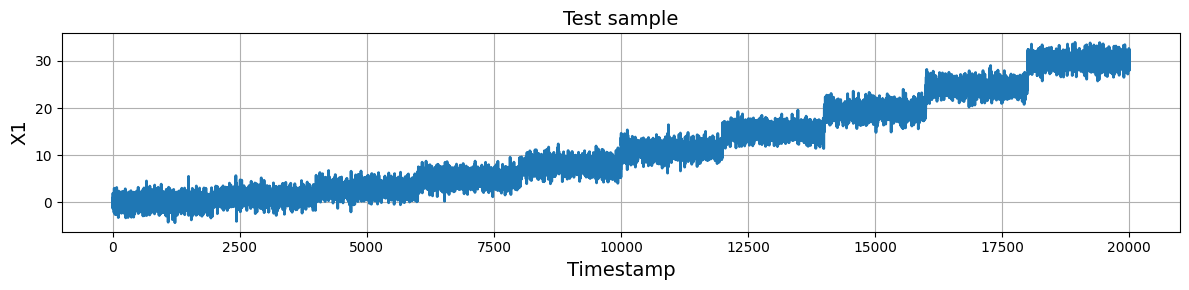

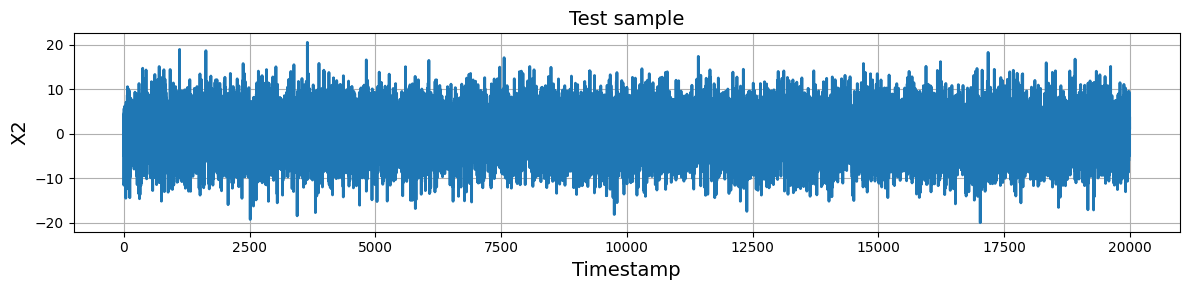

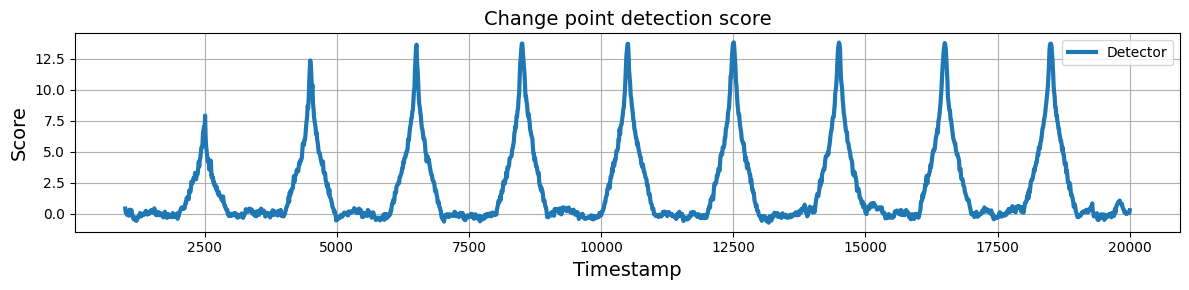

Dataset:  ../data/synthetic_dataset_2/ 


File's path:  ../data/synthetic_dataset_2/sample_9.csv
Sample shape:  (20000, 4)


,Time,X1,X2,Label
0,0,-1.090385,8.398670,0
1,1,-0.313914,2.455981,0
2,2,-0.749530,-3.405018,0
3,3,-0.661796,-5.050949,0
4,4,0.829531,5.315160,0


Cahnge Point ROC AUC:  0.885072705072705


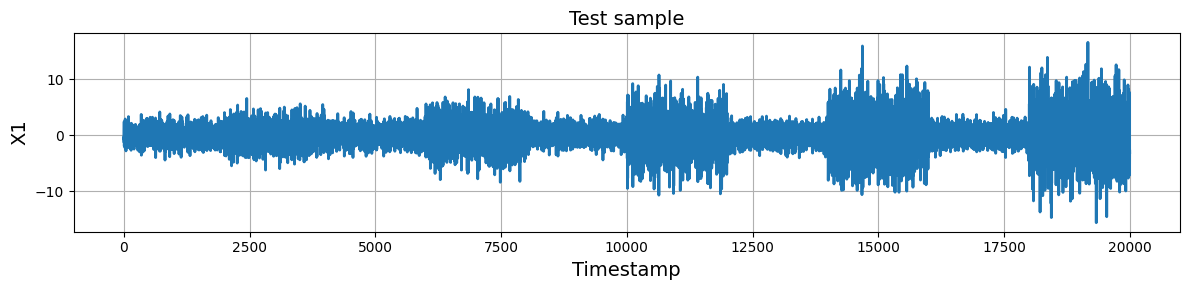

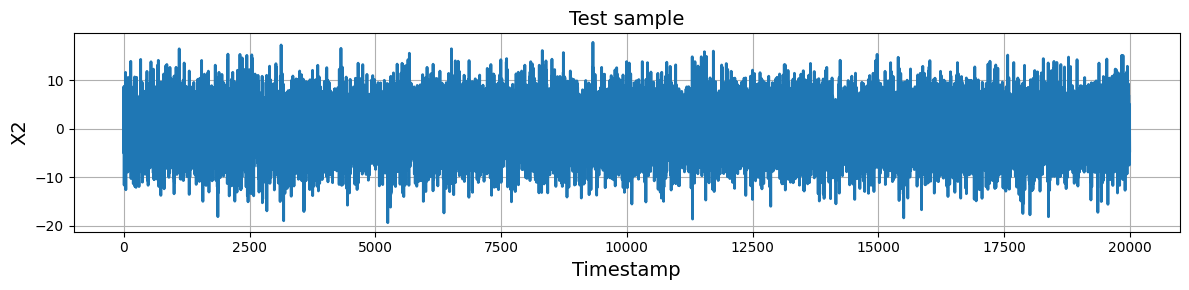

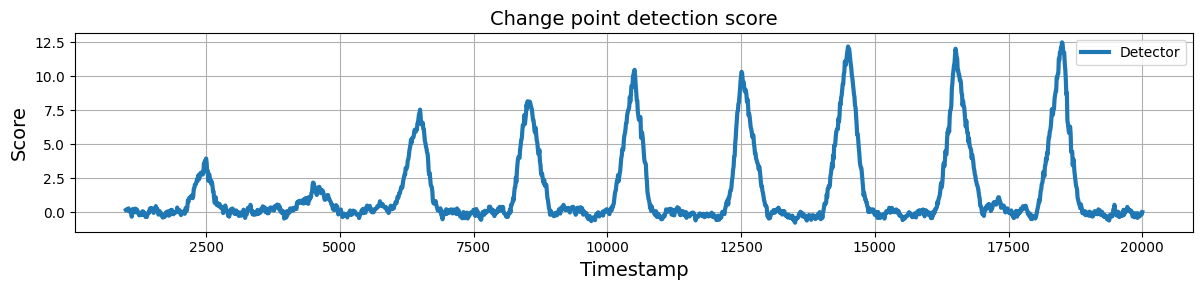

Dataset:  ../data/synthetic_dataset_3/ 


File's path:  ../data/synthetic_dataset_3/sample_9.csv
Sample shape:  (20000, 4)


,Time,X1,X2,Label
0,0,1.250199,-0.733159,0
1,1,0.358777,0.824990,0
2,2,-0.296463,0.821523,0
3,3,-0.258010,0.782258,0
4,4,0.948878,-1.404706,0


Cahnge Point ROC AUC:  0.9665800865800865


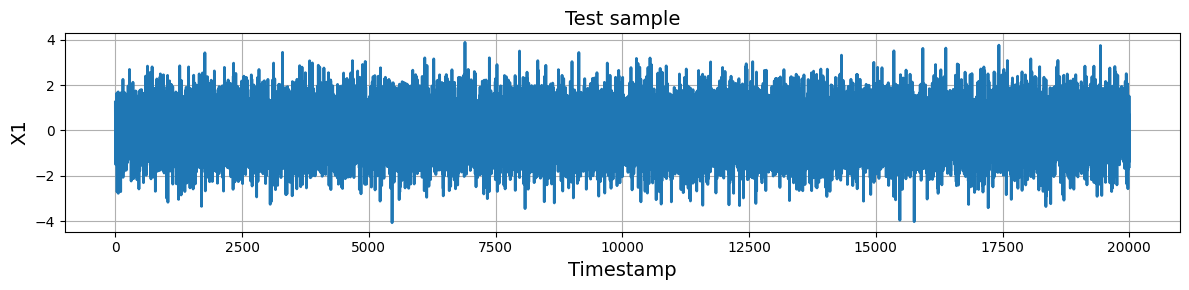

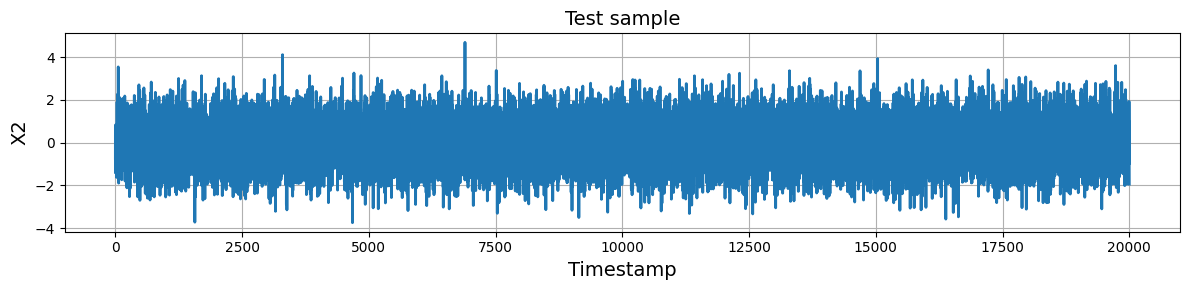

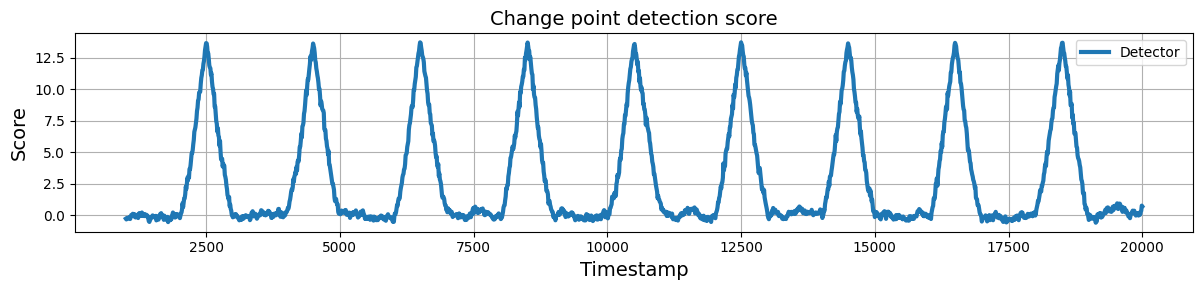

Dataset:  ../data/kepler/ 


File's path:  ../data/kepler/kepler_9610.csv
Sample shape:  (43093, 3)


,Time,X1,Label
0,0,1034286.00,0.0
1,1,1034403.94,0.0
2,2,1034205.75,0.0
3,3,1034059.40,0.0
4,4,1034255.80,0.0


Cahnge Point ROC AUC:  0.9280632286087732


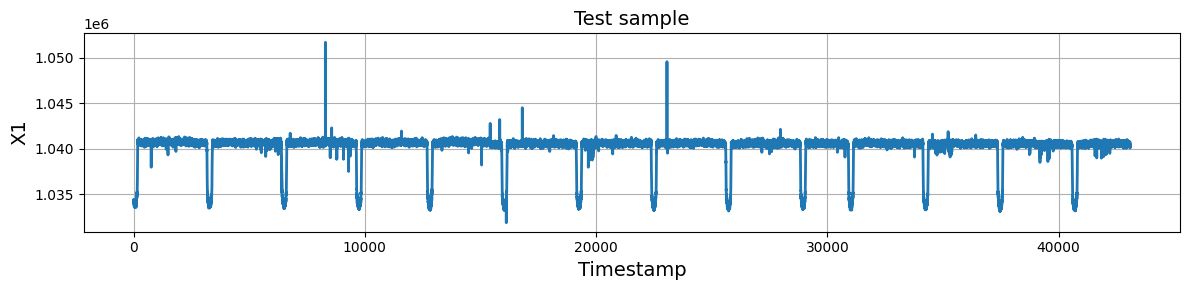

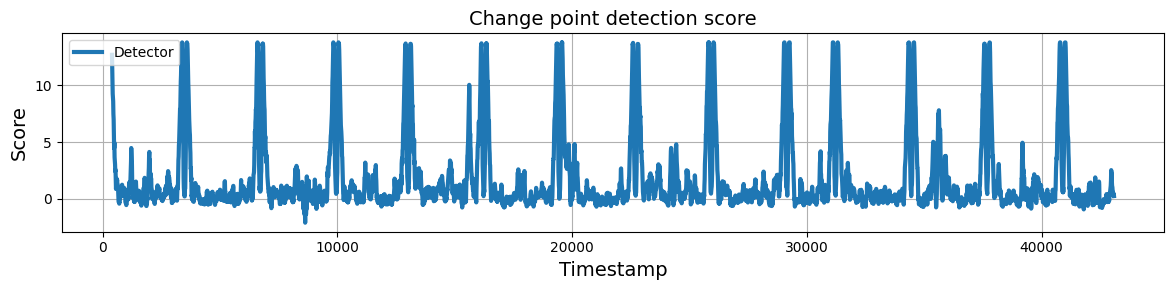

Dataset:  ../data/iris/ 


File's path:  ../data/iris/sample_9.csv
Sample shape:  (16201, 3)


,Time,X1,Label
0,0,5323.983401,0.0
1,1,6396.868445,0.0
2,2,6258.212654,0.0
3,3,5552.653980,0.0
4,4,5975.048630,0.0


Cahnge Point ROC AUC:  0.9537156931738213


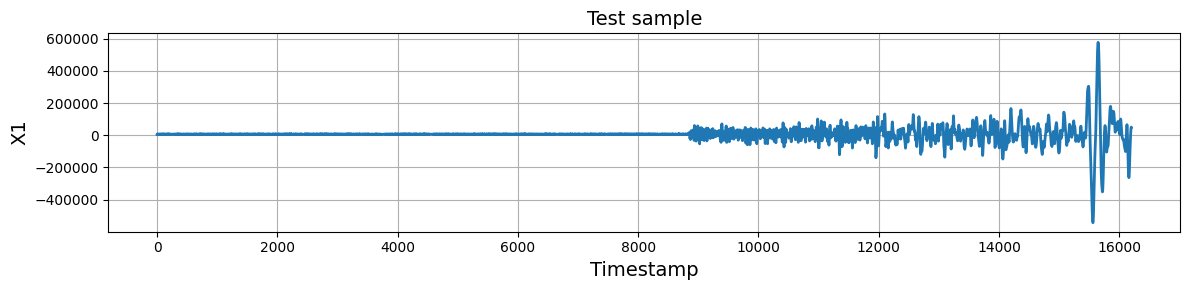

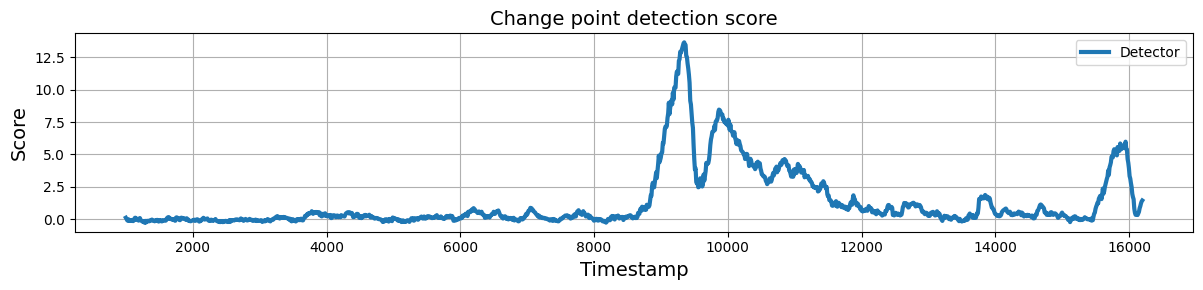

In [7]:
for apath in dataset_paths:
    
    print("Dataset: ", apath, "\n\n")
    files = get_files_list(apath)
    
    window_size = 500
    if apath == "../data/kepler/":
        window_size = 200
    
    for afile in files[-1:]:
        print("File's path: ", afile)
        
        # Read a sample
        data = pd.read_csv(afile, index_col=False)
        print("Sample shape: ", data.shape)
        display(data.head())
        
        label = data["Label"].values
        T     = data["Time"].values
        X     = data.drop(columns=["Time", "Label"]).values
        
        # Define a change point detector
        classifier = QuadraticDiscriminantAnalysis()
        detector   = algorithms.ChangePointDetectionClassifier(base_classifier=classifier, 
                                                               metric="KL_sym", 
                                                               periods=10, 
                                                               window_size=window_size, 
                                                               step=10, 
                                                               n_runs=1)
        
        # Detect change points
        T_score, score = detector.predict(X)
        
        # Calculate quality metrics
        auc = metrics.change_point_roc_auc(T, label, T_score, score, window_size)
        print("Cahnge Point ROC AUC: ", auc)
        
        
        # Display test sample
        for i in range(X.shape[1]):
            plt.figure(figsize=(12, 3.))
            plt.plot(T, X[:, i], linewidth=2)
            plt.xlabel('Timestamp', size=14)
            plt.ylabel('X'+str(i+1), size=14)
            plt.grid(True)
            plt.title('Test sample', size=14)
            plt.tight_layout()
            plt.show()


        # Display test sample
        plt.figure(figsize=(12, 3.))
        plt.plot(T_score, score, linewidth=3, label="Detector")
        plt.xlabel('Timestamp', size=14)
        plt.ylabel('Score', size=14)
        plt.grid(True)
        plt.title('Change point detection score', size=14)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()